##(Ford go bike trip data)
## by (Youssef El Khayat)

## Investigation Overview

> We want to find out the characteristics of a long cycling trip.

## Dataset Overview

> There are 183,412 records about cycling rides in the dataset with 10 features (duration in seconds,	start_time,	end_time,	start station id,	start station name,	start station latitude,	start station longitude,	end station id,	end station name,	end station latitude,	end station longitude,	bike id,	user type,member birth year,	member gender & bike share for all trip). Most variables are numeric in nature apart from other varriables like the gender and bike share all day.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# from google.colab import files
# uploaded = files.upload()
df= pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Cyclists gender

> It appears that males the aboslute majority among the cyclists

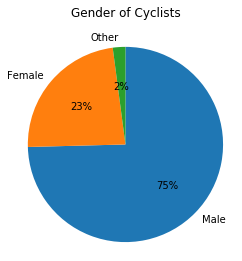

In [3]:
# creating genders pie chart
sorted_counts = df['member_gender'].value_counts();

plt.title('Gender of Cyclists',pad=20)
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,  autopct='%1.0f%%');


plt.axis('square');

## Distance covered across user types

> It appears that the subscribers cover more distance than customers

In [4]:
def distance(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [5]:
df['distance']= distance(df['start_station_latitude'],df['start_station_longitude'],df['end_station_latitude'],df['end_station_longitude'])

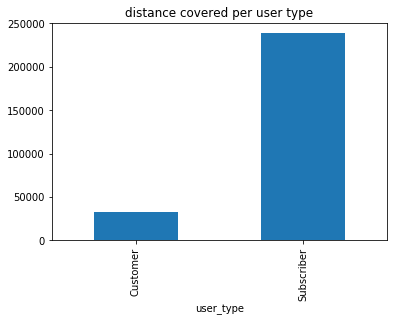

In [6]:
df.groupby('user_type').distance.sum().plot(kind='bar', title="distance covered per user type");

## Properties of long trips



In conclusion the trip that has the longest distance is of a customer who has a gender of other

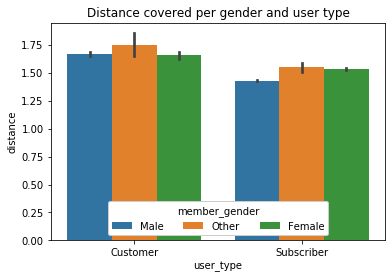

In [7]:
ax = sb.barplot(data = df, x = 'user_type', y = 'distance', hue = 'member_gender');
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'member_gender');
plt.title('Distance covered per gender and user type');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt